## Nootebook 2
### Yuritzy Pérez Corona 29/09/2023
#### DataSet: Most Streamed Spotify Songs 2023
#### Sobre el dataset: This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.
#### Obtenido de: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data el 28 de septiembre de 2023.

#### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#### Cargando los datos

In [2]:
df = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
print(df.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Parte 1: Análisis exploratorio

In [4]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

#### Analizamos características estadísticas de los datos

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


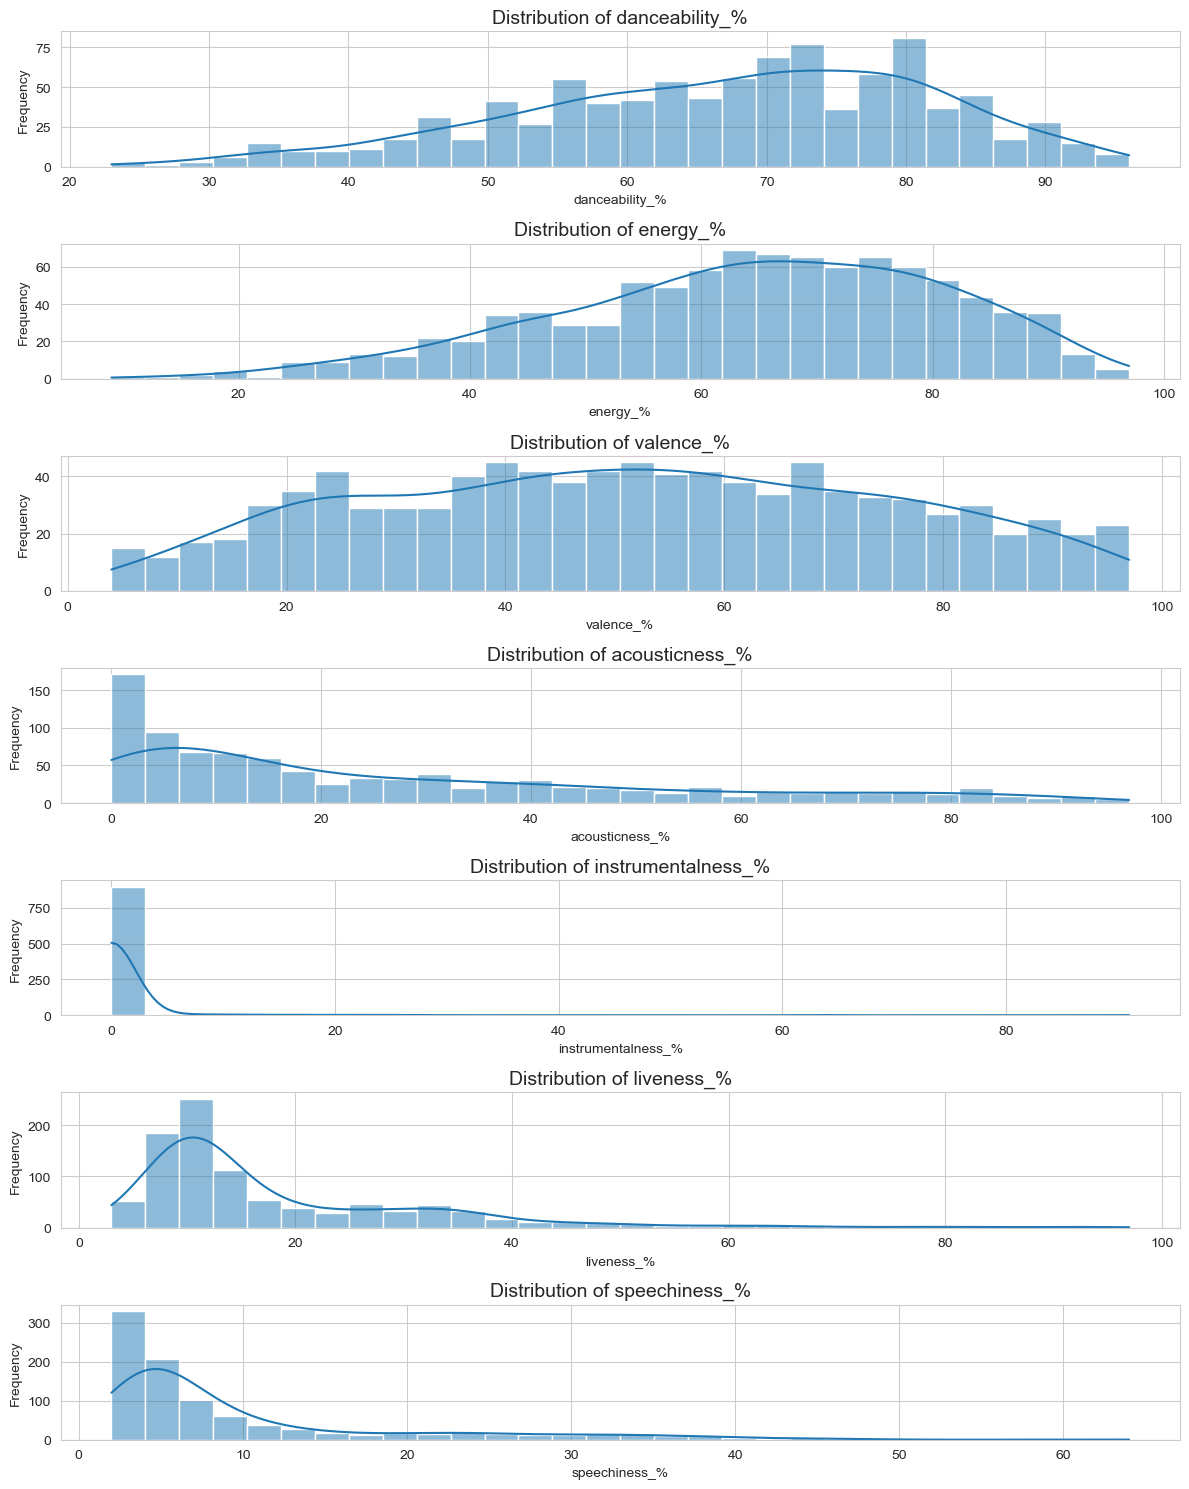

In [6]:
# Estilo de los graficos
sns.set_style("whitegrid")

# Lista de figuras a visualizar
features_to_visualize = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Armando la figura y los ejes
fig, axes = plt.subplots(nrows=len(features_to_visualize), figsize=(12, 15))

# Graficado de la distribución para cada uno na de las características
for i, feature in enumerate(features_to_visualize):
    sns.histplot(df[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Parte 2: Procesamiento de datos
### Limpieza de datos
##### Verificar si hay datos duplicados

In [7]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool


##### Verificamos de que categoría son los datos 

In [8]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']
Numerical columns : ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


##### Verificamos el número de valores únicos en las columnas categóricas

In [9]:
df[cat_col].nunique()

track_name             943
artist(s)_name         645
streams                949
in_deezer_playlists    348
in_shazam_charts       198
key                     11
mode                     2
dtype: int64

##### Eliminar los datos NaN (Valores faltantes)

In [10]:
nan_values = df.isna()
print(nan_values)

     track_name  artist(s)_name  artist_count  released_year  released_month  \
0         False           False         False          False           False   
1         False           False         False          False           False   
2         False           False         False          False           False   
3         False           False         False          False           False   
4         False           False         False          False           False   
..          ...             ...           ...            ...             ...   
948       False           False         False          False           False   
949       False           False         False          False           False   
950       False           False         False          False           False   
951       False           False         False          False           False   
952       False           False         False          False           False   

     released_day  in_spotify_playlists

In [11]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Columna '{column}' tiene {count} valores faltantes.")
        
print("\nHay valores daltantes en el DataFrame?")
print(any_missing_values)

print("\nHay valores faltantes en cada columna?")
print(any_missing_values_in_column)

print("\nCuántos valores faltantes hay en cada columna:")
print(missing_value_count)

-----> Columna 'in_shazam_charts' tiene 50 valores faltantes.
-----> Columna 'key' tiene 95 valores faltantes.

Hay valores daltantes en el DataFrame?
True

Hay valores faltantes en cada columna?
track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

Cuántos valores faltantes hay en cada columna:
track_name              

##### Eliminamos las filas de valores faltantes para todo el Dataset (con 'key' porque es donde más valores faltantes hay)

In [12]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce') #Convertimos la columna llamada streams a valores numéricos
df = df.dropna(subset=['key']) #Cambiamos nuestro dataframe convertido
df .dropna(inplace=True) #Cambiamos los valores NaN
(df .shape)


(816, 24)

##### Verificamos que ya no haya valores faltantes

In [13]:
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

##### Asigna un ID único a cada nombre de pista en el DataFrame y luego reemplazar la columna de nombres de pista por una columna de IDs de pistas en el mismo DataFrame


In [14]:
track_name_to_id = {name: idx for idx, name in enumerate(df['track_name'].unique())}
df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)

##### Selecciona un conjunto de columnas específicas del DataFrame original y crea un nuevo DataFrame llamado df_voi que contiene solo esas columnas


In [15]:
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi.head()

,track_id,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,141381703.0,125,B,Major,80,89,83,31,0,8,4
1,1,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,2,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,3,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,4,303236322.0,144,A,Minor,65,23,80,14,63,11,6


##### DataFrame expandido que incluye las características originales y las características codificadas en one-hot para las columnas 'key' y 'mode'


In [16]:
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features.head()

,track_id,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,0,0,0,0,0,0,0,0,1,0
1,1,133716286.0,92,71,61,74,7,0,10,4,...,1,0,0,0,0,0,0,0,1,0
2,2,140003974.0,138,51,32,53,17,0,31,6,...,0,0,0,0,1,0,0,0,1,0
3,3,800840817.0,170,55,58,72,11,0,11,15,...,0,0,0,0,0,0,0,0,1,0
4,4,303236322.0,144,65,23,80,14,63,11,6,...,0,0,0,0,0,0,0,0,0,1


##### Cambiamos los nombres de nuestras columnas de interés para que sea más fácil su manejo

In [17]:
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}

df_features.rename(columns=re_col, inplace=True)
df_features.head()

,track_id,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,141381703.0,125,80,89,83,31,0,8,4,...,0,0,0,0,0,0,0,0,1,0
1,1,133716286.0,92,71,61,74,7,0,10,4,...,1,0,0,0,0,0,0,0,1,0
2,2,140003974.0,138,51,32,53,17,0,31,6,...,0,0,0,0,1,0,0,0,1,0
3,3,800840817.0,170,55,58,72,11,0,11,15,...,0,0,0,0,0,0,0,0,1,0
4,4,303236322.0,144,65,23,80,14,63,11,6,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df_da = df_features.drop(columns=['track_id'])
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,0,...,0,0,0,0,0,0,0,0,1,0
1,133716286.0,92,71,61,74,7,0,10,4,0,...,1,0,0,0,0,0,0,0,1,0
2,140003974.0,138,51,32,53,17,0,31,6,0,...,0,0,0,0,1,0,0,0,1,0
3,800840817.0,170,55,58,72,11,0,11,15,1,...,0,0,0,0,0,0,0,0,1,0
4,303236322.0,144,65,23,80,14,63,11,6,1,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df_da.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,4.689858e+08,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539,0.085784,...,0.140931,0.095588,0.036765,0.072304,0.106618,0.084559,0.111520,0.104167,0.552696,0.447304
std,5.231267e+08,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852,0.280217,...,0.348164,0.294206,0.188299,0.259149,0.308816,0.278395,0.314968,0.305664,0.497520,0.497520
min,2.762000e+03,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.342848e+08,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.638368e+08,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.011986e+08,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.562544e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int) 
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0                 0         8            4      0  ...       0      0       0   
1                 0        10            4      0  ...       1      0       0   
2                 0        31            6      0  ...       0      0       0   
3                 0        11           15      1  ...       0      0       0   
4                63        11            6      1  ...       0      0       0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0      0      0       0      0       0 

In [21]:
df_da = df_da.astype(float)
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,141381703.0,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,133716286.0,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,140003974.0,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,800840817.0,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,303236322.0,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
df_da.shape

(816, 22)

##### La escala Min-Max reescala los valores a un rango especificado, típicamente entre 0 y 1. Preserva la distribución original y asegura que el valor mínimo se mapee a 0 y el valor máximo se mapee a 1.

In [23]:
scaler = MinMaxScaler()

df_da['streams'] = scaler.fit_transform(df_da[['streams']])
print(df_da.head())

    streams    bpm  danceability  valence  energy  acousticness  \
0  0.039685  125.0          80.0     89.0    83.0          31.0   
1  0.037533   92.0          71.0     61.0    74.0           7.0   
2  0.039298  138.0          51.0     32.0    53.0          17.0   
3  0.224794  170.0          55.0     58.0    72.0          11.0   
4  0.085117  144.0          65.0     23.0    80.0          14.0   

   instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  key_D#  \
0               0.0       8.0          4.0    0.0  ...     0.0    0.0     0.0   
1               0.0      10.0          4.0    0.0  ...     1.0    0.0     0.0   
2               0.0      31.0          6.0    0.0  ...     0.0    0.0     0.0   
3               0.0      11.0         15.0    1.0  ...     0.0    0.0     0.0   
4              63.0      11.0          6.0    1.0  ...     0.0    0.0     0.0   

   key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    0.0    0.0     0.0    0.0     0.0       

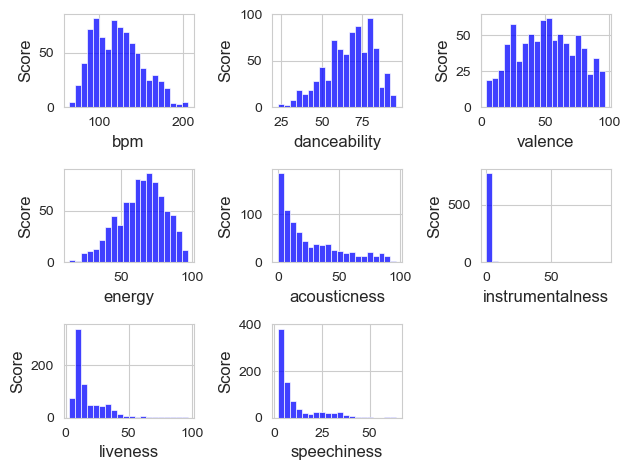

In [24]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

##### En este caso no eliminaremos valores fuera de rango porque consideramos que como son estadísticas de las canciones, no hay valores fuera de rango
### Reducción de dimensionalidad
##### Se carga la paquetería para hacer la reducción de dimensionalidad.

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

##### Pasamos de DataFrame a Numpy


In [26]:
# Creamos un DataFrame donde solo haya números
columnas_a_eliminar = ['key', 'mode']  
df_red = df_voi.drop(columnas_a_eliminar, axis=1)
print(df_red.head())

   track_id      streams  bpm  danceability_%  valence_%  energy_%  \
0         0  141381703.0  125              80         89        83   
1         1  133716286.0   92              71         61        74   
2         2  140003974.0  138              51         32        53   
3         3  800840817.0  170              55         58        72   
4         4  303236322.0  144              65         23        80   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0              31                   0           8              4  
1               7                   0          10              4  
2              17                   0          31              6  
3              11                   0          11             15  
4              14                  63          11              6  


In [27]:
# Creamos un DataFrame donde solo haya números
Columnas_a_eliminar = ['key', 'mode']  
df_red = df_voi.drop(columnas_a_eliminar, axis=1)

# Guardar los nombres originales de las columnas numéricas
nombres_originales = df_red.columns


# Normalizamos los datos (opcional pero recomendado)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_red)
print(df_scaled)

[[-1.72965579 -0.62662631  0.08587151 ... -0.19150181 -0.7510259
  -0.63969891]
 [-1.7253712  -0.64128837 -1.08553072 ... -0.19150181 -0.60333651
  -0.63969891]
 [-1.72108661 -0.62926157  0.547333   ... -0.19150181  0.94740212
  -0.44393881]
 ...
 [ 1.72800706 -0.75644121 -1.08553072 ... -0.19150181 -0.7510259
  -0.44393881]
 [ 1.73229165 -0.64094537 -0.90804554 ... -0.19150181 -0.45564712
  -0.54181886]
 [ 1.73657624 -0.71341625 -1.1565248  ... -0.19150181 -0.52949181
  -0.54181886]]


##### Primera técnica aplicada PCA para ensayar lo hacemos para 3 y 2 componentes principales

In [28]:
# Aplicar PCA
pca = PCA(n_components=3)  # Especifica el número de componentes principales deseados
principal_components = pca.fit_transform(df_scaled)

# Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# El DataFrame df_pca ahora contiene los valores de los componentes principales
print(df_pca)

          PC1       PC2       PC3
0   -1.591080 -0.798536  1.376377
1   -0.966744 -0.977596  0.857368
2    1.066265 -1.393285 -0.560172
3   -0.188230 -1.432275  0.317885
4    1.284543 -2.049633 -2.231875
..        ...       ...       ...
811  2.191857  1.404321 -0.546123
812  4.068606  1.521101 -0.980006
813 -1.568972  1.246732  0.011641
814 -1.601323  0.916160 -0.327986
815  0.183738  0.759302 -0.969988

[816 rows x 3 columns]


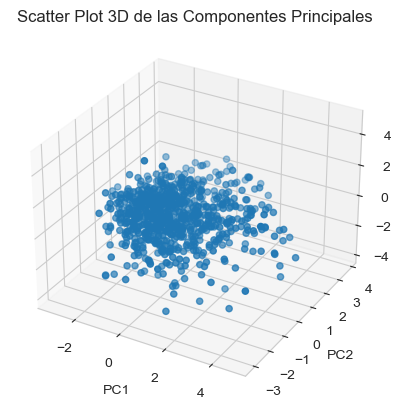

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Scatter Plot 3D de las Componentes Principales')
plt.show()

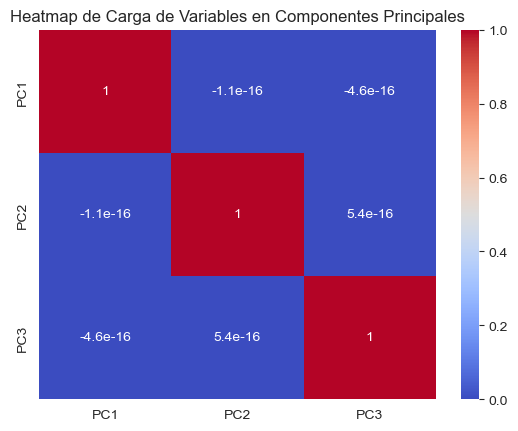

In [30]:
corr_matrix = df_pca.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de Carga de Variables en Componentes Principales')
plt.show()

In [31]:
# Aplicar PCA
pca2= PCA(n_components=2)  # Especifica el número de componentes principales deseados
principal_components = pca2.fit_transform(df_scaled)

# Crear un nuevo DataFrame con los componentes principales
df_pca2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# El DataFrame df_pca ahora contiene los valores de los componentes principales
print(df_pca2)

          PC1       PC2
0   -1.591080 -0.798536
1   -0.966744 -0.977596
2    1.066265 -1.393285
3   -0.188230 -1.432275
4    1.284543 -2.049633
..        ...       ...
811  2.191857  1.404321
812  4.068606  1.521101
813 -1.568972  1.246732
814 -1.601323  0.916160
815  0.183738  0.759302

[816 rows x 2 columns]


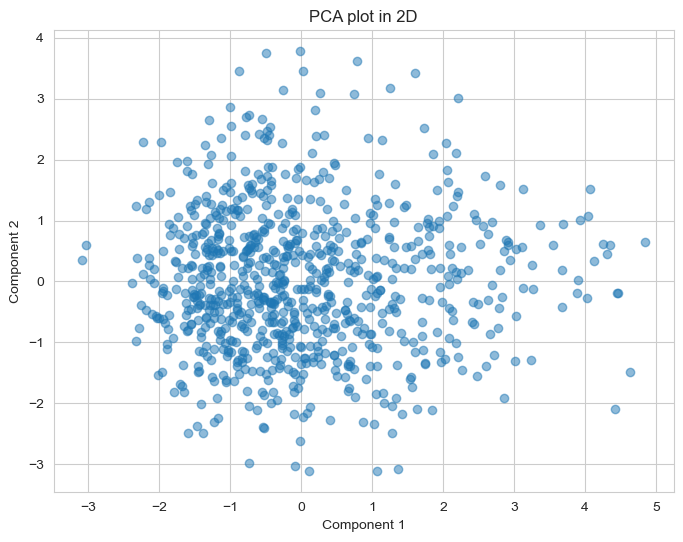

In [32]:
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5) 
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

##### Segundad técnica aplicada  LDA

In [33]:
print(df_red.columns)

Index(['track_id', 'streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [34]:
X = df_red.loc[:, df_red.columns != 'track_id'].values
print(len(X))

816


In [35]:
y = df_red['track_id'].values
print(len(y))

816


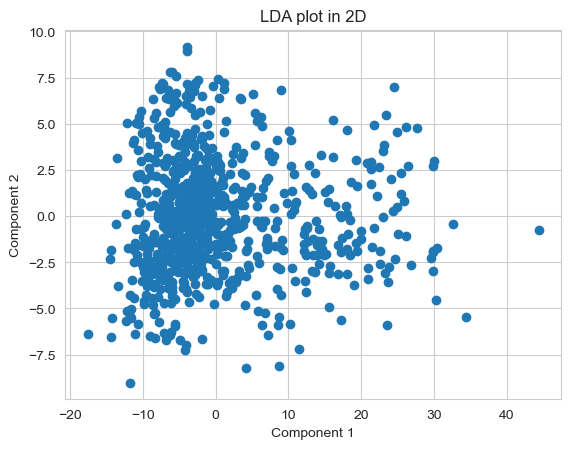

In [36]:
df_LDA = LDA(n_components=2).fit_transform(X,y)
scatter = plt.scatter(df_LDA[:,0], df_LDA[:,1])
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

##### Tercera técnica aplicada t-SNE

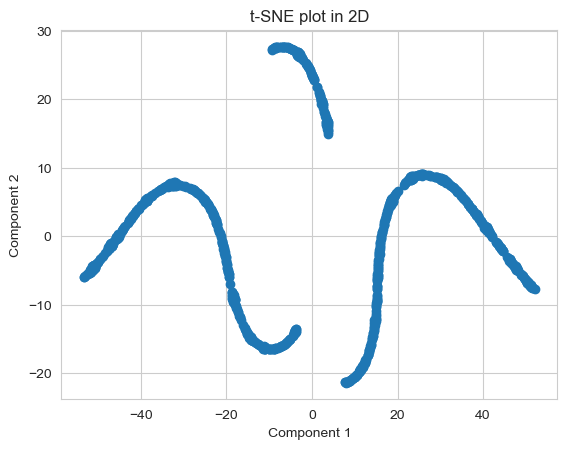

In [37]:
X_TSNE = TSNE().fit_transform(df_red)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1])
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

##### ChatGPT: t-SNE se utiliza principalmente para visualizar datos de alta dimensionalidad en un espacio de menor dimensión, como 2D o 3D, para ayudar en la exploración y comprensión de la estructura subyacente de los datos. A diferencia de otras técnicas de reducción de dimensionalidad, como el Análisis de Componentes Principales (PCA), t-SNE es especialmente efectivo para preservar estructuras no lineales y relaciones no lineales entre los puntos de datos.
##### En esta técnica se muestran mejor separadas las características.

##### Y la cuarta y técnica solo para aplicar todas las de la clase... UMAP

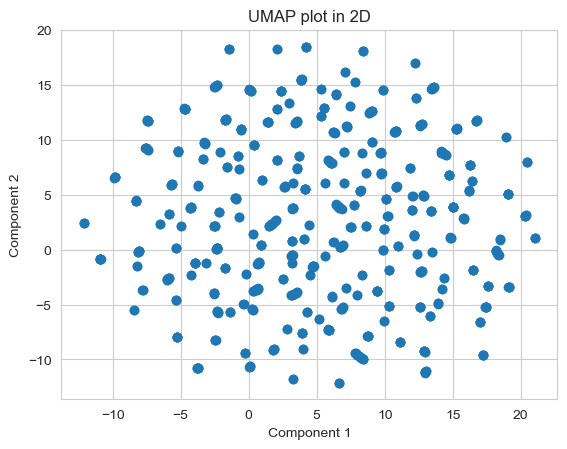

In [38]:
df_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation').fit_transform(df_red)

scatter = plt.scatter(df_UMAP[:,0], df_UMAP[:,1])
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Selección de características
##### Cargamos la paquetería para cada uno de los métodos de filtrado.

In [39]:
# InfoGain
from sklearn.feature_selection import mutual_info_classif
# Chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Low variance
from sklearn.feature_selection import VarianceThreshold
# Univariate feature selection
from sklearn.feature_selection import f_classif

#### InfoGain
#####  De lo visto en clase: Estima la información mutua para una variable objetivo discreta. Mide la dependencia enre las varias, es igual a cero si solo si dos variables son aleatorias, los valores altos significan mayor dependencia. Esta función utiliza metodos no paramétricos basados en la estimación de la entropía a partir de las distancias.

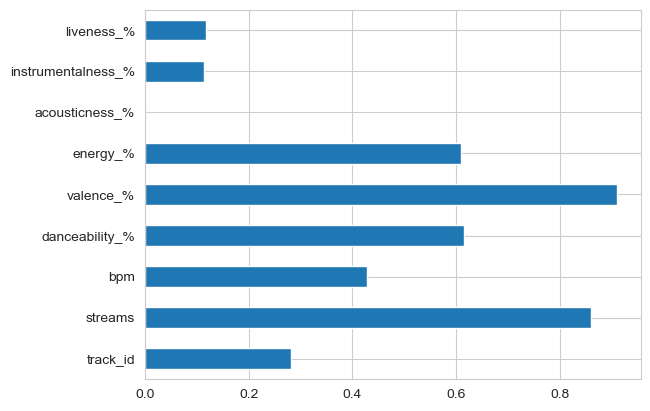

In [40]:
X_new = mutual_info_classif(X, y)
feat_imp = pd.Series(X_new, df_red.columns[0:len(df_red.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

#### Chi2
##### Mide la dependencia entre las variables, por lo que esta función elimina las características que tienen más probabilidades de ser independientes de la clase y, por lo tanto, irrelevantes para la clasificación.

In [41]:
chi2_feat = SelectKBest(chi2, k=3) #Con cuantas nos queremos quedar
X_chi2 = chi2_feat.fit_transform(X, y)
print(X_chi2.shape)

(816, 3)


#### Univariate feature selection
##### Utilizamos esta prueba para recuperar las tres mejores características de nuestro conjunto de datos.

In [42]:
X_F = SelectKBest(f_classif, k=2).fit_transform(X, y) #Con cuantas caracteristicas me quedo, pero el programa dice cuales son mejores
print(X_F.shape)

(816, 2)


#### Coeficiente de Correlación 
##### Utilizaremos el coeficiente de correlación entre las variables que tenemos. Si dos variables están correlacionadas, podemos predecir una a partir de la otra. Por lo tanto, si dos características están correlacionadas, el modelo solo necesita una de ellas, ya que la segunda no agrega información adicional. Aquí utilizaremos la Correlación de Pearson.

In [43]:
columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()
print(correlation_matrix)

                       bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.148816  0.029743  0.013523     -0.011187   
danceability     -0.148816      1.000000  0.391414  0.158418     -0.241593   
valence           0.029743      0.391414  1.000000  0.349616     -0.063197   
energy            0.013523      0.158418  0.349616  1.000000     -0.552592   
acousticness     -0.011187     -0.241593 -0.063197 -0.552592      1.000000   
instrumentalness -0.003512     -0.102436 -0.146891 -0.051599      0.046539   
liveness         -0.005865     -0.100742  0.000249  0.111277     -0.046209   
speechiness       0.037862      0.200489  0.036649 -0.026630     -0.018517   
streams          -0.025694     -0.093268 -0.051014 -0.036499     -0.005751   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.003512 -0.005865     0.037862 -0.025694  
danceability             -0.102436 -0.100742     0.200489 -0.093268  
valence  

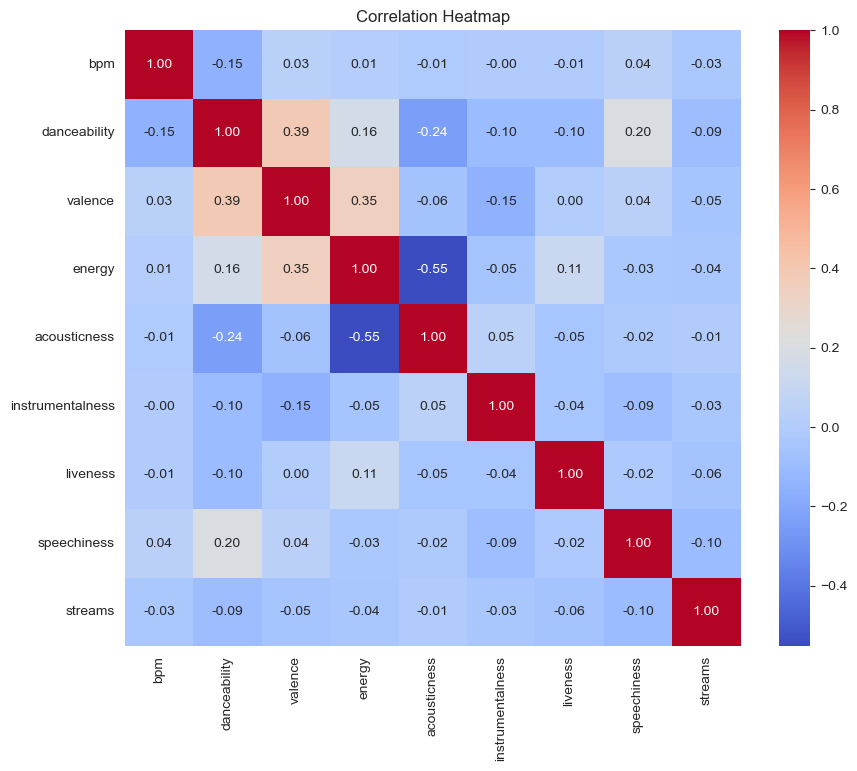

In [44]:

columns_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

correlation_matrix = df_da[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

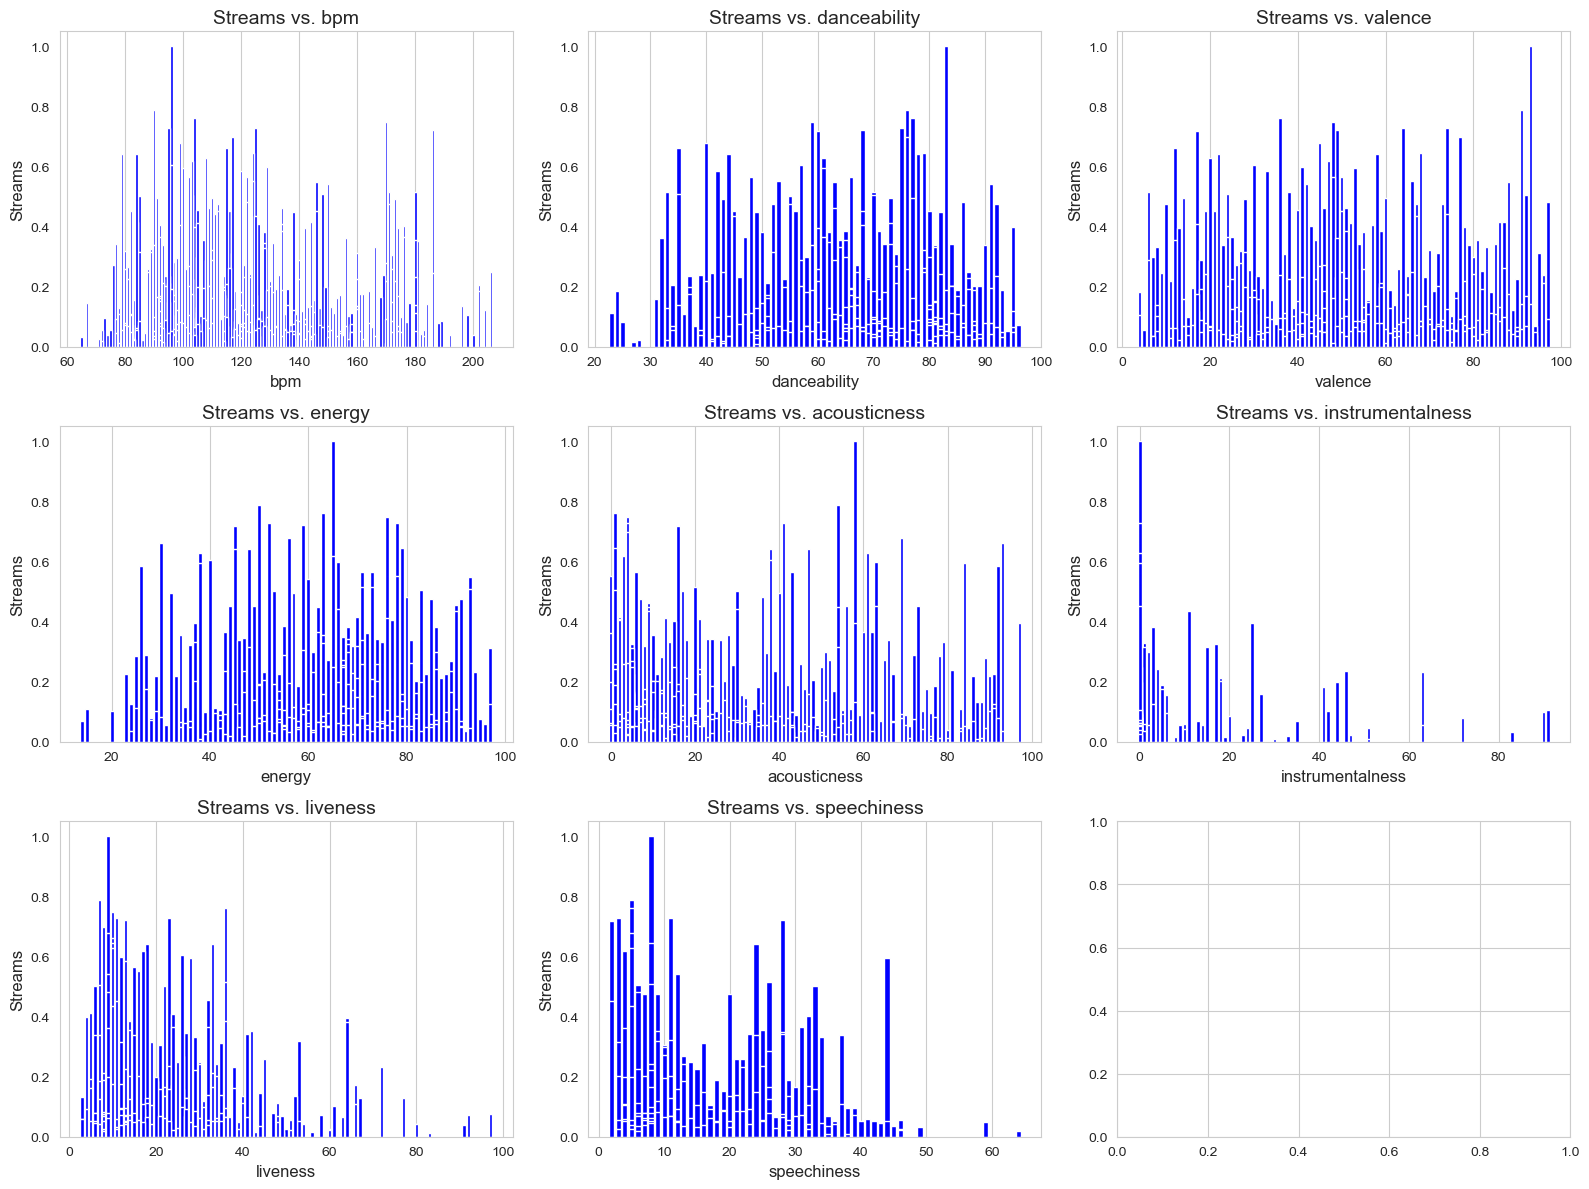

In [45]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df_da[column], df_da['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\lic.-Ing.Yuri\AppData\Local\Temp\ipykernel_7484\646345061.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


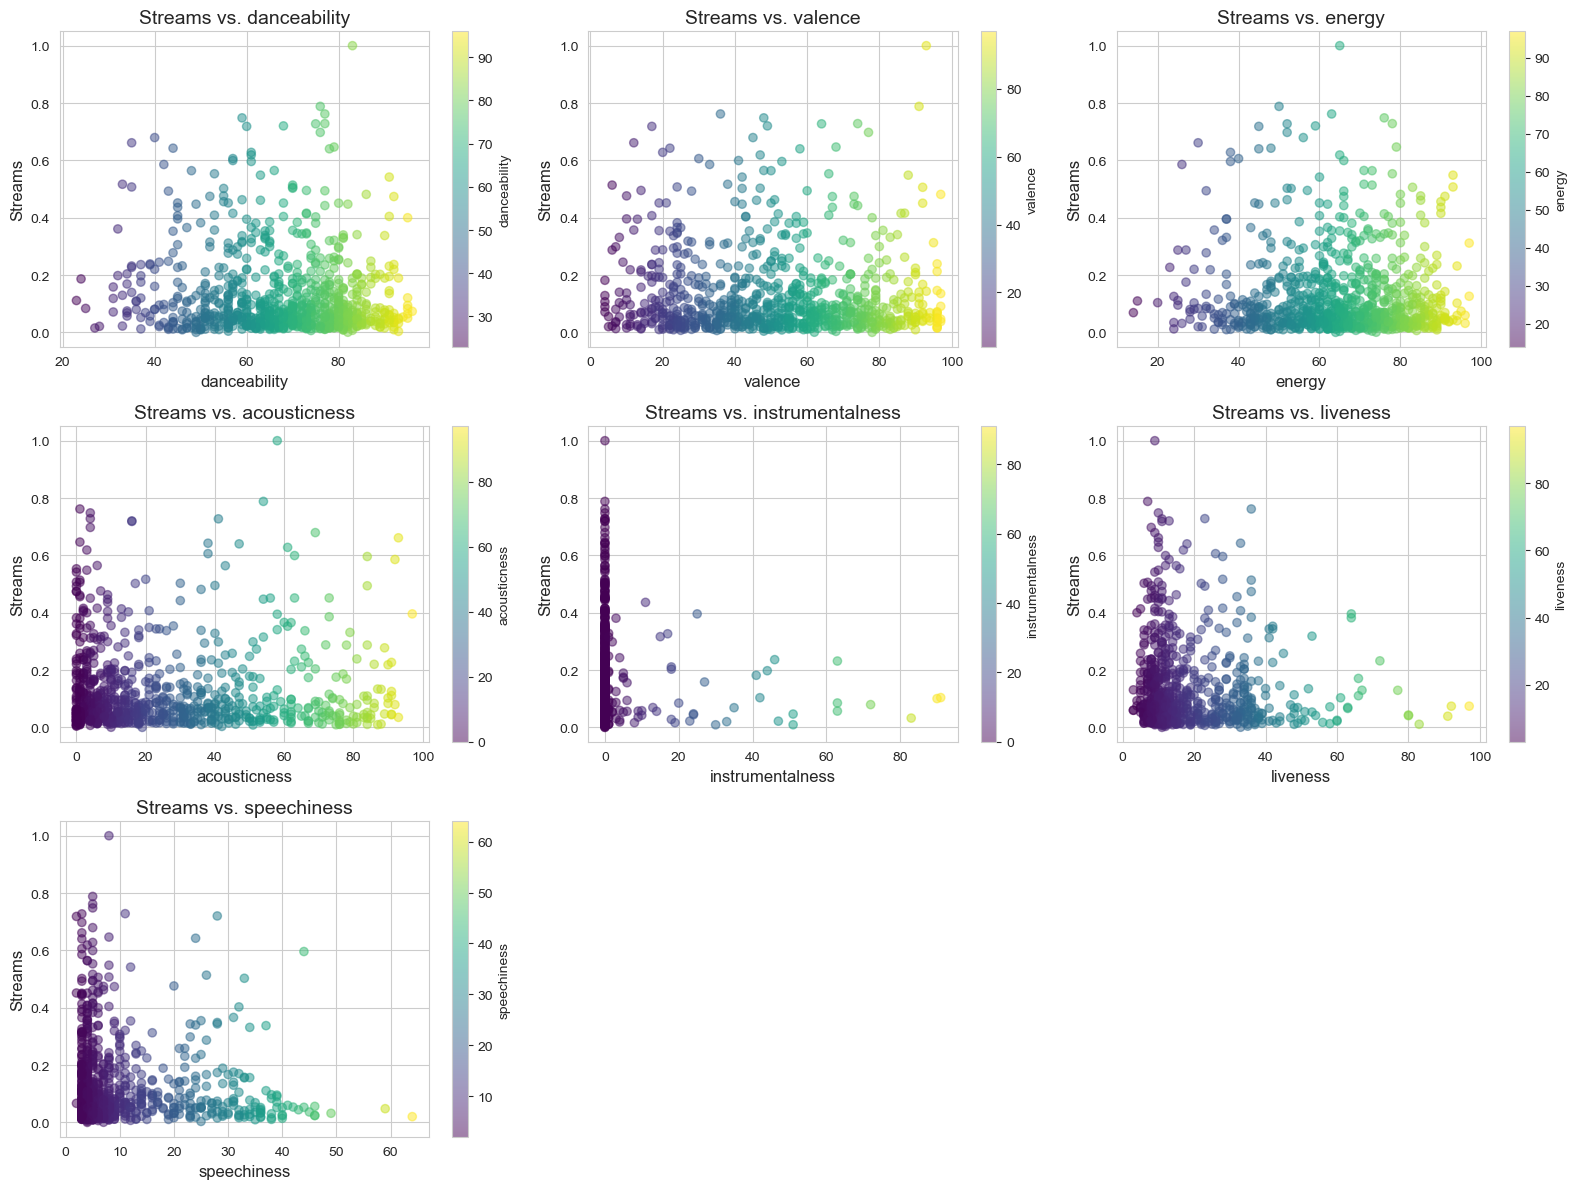

In [46]:
columns_to_plot = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df_da[column], df_da['streams'], c=df_da[column], cmap=colormap, alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [47]:
df_da = df_da.merge(df[['key']], left_index=True, right_index=True, how='inner')
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key
0,0.039685,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
1,0.037533,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C#
2,0.039298,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,F
3,0.224794,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
4,0.085117,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,A


#### Métodos Wrapper
##### Cargamos las librerías


In [48]:
# Forward selection/Backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

#### Forward selection
##### Metodo iterativo en el que comenzamos con las características de rendimiento frente a las características objetivo. Se seleccioa una segunda variable que ofrezca el mejor rendimiento en combinación con la primera variable seleccionada y continua hasta que se alcanza el criterio preestablecido.

In [49]:
lr = LinearRegression()

ffs = SequentialFeatureSelector(lr, k_features='best', forward = True)
ffs.fit(X, y)

features = list(ffs.k_feature_names_)

print(features)

['3', '6', '7', '8']


#### Backward elimination
##### Opuesto al anterior.

In [50]:
bfs = SequentialFeatureSelector(lr, k_features='best', forward = False)
bfs.fit(X, y)

features = list(bfs.k_feature_names_)
print(features)

['3', '6', '7', '8']


#### Métodos integrados
#### Random Forest Importance
##### De la clase: Algoritmo que agrega un número determinado de arboles de decisión. Se clasifican de forma natural en función de lo bien que mejoran la pureza del nodo. Los nodos con la mayor disminución de impureza ocurren al principio de los árboles, mientras que las notas con la menor disminución de impureza ocurren al final de los árboles. Así, podando los árboles por debajo de un nodo concreto, podemos crear un subconjunto de las características más importantes

<Axes: >

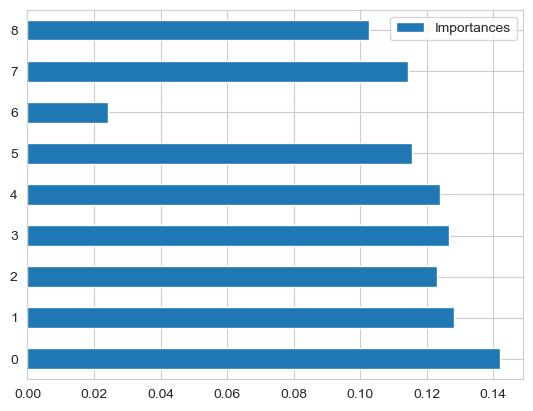

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": df_red.columns[0:len(df_red.columns)-1], "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh()

### Conclusiones
#### Limpieza de Datos: Se realizaron operaciones para limpiar y preparar los datos, como eliminar columnas no deseadas, manejar valores faltantes y normalizar los datos cuando era necesario.
#### Reducción de Dimensionalidad: Se utilizaron múltiples técnicas de reducción de dimensionalidad, como PCA, LDA, t-SNE y UMAP, para reducir la complejidad de los datos y facilitar la visualización y el análisis.Se observó que cada técnica tiene sus propias ventajas y limitaciones. 
#### Selección de Características: Se aplicaron diversas estrategias de selección de características para identificar las variables más relevantes para el objetivo de analizar las canciones más reproducidas. Se utilizaron pruebas estadísticas, correlaciones, visualizaciones y técnicas de modelado, como Random Forest Importance, para evaluar la importancia de las características. La combinación de métodos univariados y wrapper, como Forward Selection y Backward Elimination, refleja un enfoque completo para encontrar las características más informativas.
#### En general, considero que realizar limpieza de datos, reducción de dimensionalidad y selección de características es esencial para comprender y modelar los datos. Al reducir la dimensionalidad, se puede mejorar la eficacia al trabajarlos y se facilita la interpretación de los resusltados. La selección de características garantiza que se utilicen solamente las variables más influyentes en el modelo, lo que puede mejorar la precisión y la generalización. Este trabajo me ayudó a entender mejor la preparación de los datos y la selección de características para construrir modelos. Espero poderlo aplicar a mi Dataset real, traté de realizar la mayor cantidad de técnicas para poder comprender su funcionamiento y poder aplicarlas.
### Refrencias
#### [1] https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data
#### [2] https://www.kaggle.com/code/franoisgeorgesjulien/spotify-1-what-does-it-take-to-hit-the-charts
#### [3] https://www.kaggle.com/code/mertbayraktar/eda-freq-collab-artists
#### [4] Material de clase Introducción a la ciencia de datos.